# Nettoyage des données

## Import des librairies

In [1]:
# Import the `pandas` library as `pd`
import pandas as pd
# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
# Import the `numpy` library as `np`
import numpy as np

import seaborn as sns
sns.set(style="ticks", color_codes=True)

## Chargement de la base

In [2]:
data = pd.read_csv("Base/fr.openfoodfacts.org.products.csv", parse_dates=[4,6],sep='\t',
                   dtype={0: str,
                          3: str,
                          5: str,
                          19: str,
                          20: str,
                          24: str,
                          25: str,
                          26: str,
                          27: str,
                          28: str,
                          35: str,
                          36: str,
                          37: str,
                          38: str,
                          39: str,
                          48: str})
# J'imprime les 5 premières lignes afin de contrôler que l'import a fonctionné.
print(data.head(5))

            code                                                url  \
0  0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1  0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2  0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3  0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4  0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957 

### Caractéristiques du dataframe

In [3]:
data.axes

[RangeIndex(start=0, stop=320772, step=1),
 Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
        'last_modified_t', 'last_modified_datetime', 'product_name',
        'generic_name', 'quantity',
        ...
        'ph_100g', 'fruits-vegetables-nuts_100g',
        'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
        'carbon-footprint_100g', 'nutrition-score-fr_100g',
        'nutrition-score-uk_100g', 'glycemic-index_100g',
        'water-hardness_100g'],
       dtype='object', length=162)]

In [4]:
# Affichage de TOUTES les colonnes
for col in range(len(data.columns)):
    print(col, ":\t", data.columns[col], "\t", data.dtypes[col])

0 :	 code 	 object
1 :	 url 	 object
2 :	 creator 	 object
3 :	 created_t 	 object
4 :	 created_datetime 	 object
5 :	 last_modified_t 	 object
6 :	 last_modified_datetime 	 object
7 :	 product_name 	 object
8 :	 generic_name 	 object
9 :	 quantity 	 object
10 :	 packaging 	 object
11 :	 packaging_tags 	 object
12 :	 brands 	 object
13 :	 brands_tags 	 object
14 :	 categories 	 object
15 :	 categories_tags 	 object
16 :	 categories_fr 	 object
17 :	 origins 	 object
18 :	 origins_tags 	 object
19 :	 manufacturing_places 	 object
20 :	 manufacturing_places_tags 	 object
21 :	 labels 	 object
22 :	 labels_tags 	 object
23 :	 labels_fr 	 object
24 :	 emb_codes 	 object
25 :	 emb_codes_tags 	 object
26 :	 first_packaging_code_geo 	 object
27 :	 cities 	 object
28 :	 cities_tags 	 object
29 :	 purchase_places 	 object
30 :	 stores 	 object
31 :	 countries 	 object
32 :	 countries_tags 	 object
33 :	 countries_fr 	 object
34 :	 ingredients_text 	 object
35 :	 allergens 	 object
36 :	 allerge

In [5]:
data.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


C:\Users\Administrateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


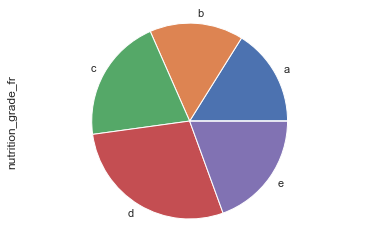

C:\Users\Administrateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  # This is added back by InteractiveShellApp.init_path()


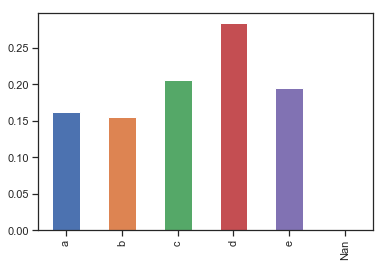

In [6]:
# VARIABLE QUALITATIVE
grades = ['a', 'b', 'c','d','e','Nan']

# Diagramme en secteurs
data["nutrition_grade_fr"].value_counts(normalize=True).loc[grades].plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
data["nutrition_grade_fr"].value_counts(normalize=True).loc[grades].plot(kind='bar')
plt.show()

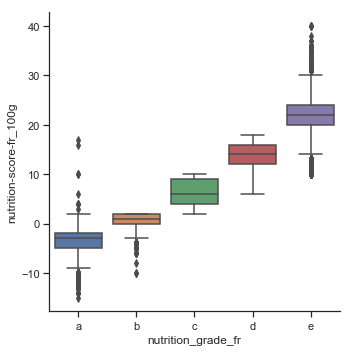

In [7]:
data_sort = data.sort_values(by=['nutrition_grade_fr'])
sns.catplot(x="nutrition_grade_fr", y="nutrition-score-fr_100g", kind="box", data=data_sort)

In [8]:
#On liste les valeurs uniques prises par le champ 'countries' pour déterminer comment on va faire le tri
print(data.main_category_fr.unique())
# On sépare les produits boissons du reste
data_boissons = data['categories_tags'].str.contains('Boissons')
data_liq = data.drop(data.loc[data_boissons == True].index, inplace=False)

data_boissons = data['categories_tags'].str.contains('Boissons')
data_sol = data.drop(data.loc[data_boissons == False].index, inplace=False)
print(data_liq.shape)
print(data_sol.shape)

[nan 'Filet-de-boeuf' 'Légumes frais' ... 'Sauce-a-l-ail' 'Attieke'
 'pl:Szprot']
(320772, 162)
(236383, 162)


In [9]:
data.categories.count()

84410

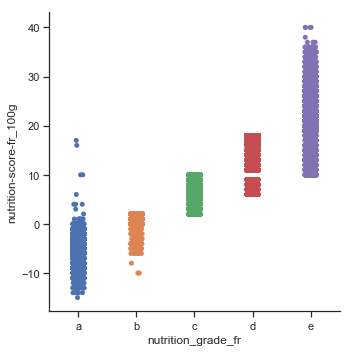

In [10]:
data_sort = data_liq.sort_values(by=['nutrition_grade_fr'])
# sns.catplot(x="nutrition_grade_fr", y="nutrition-score-fr_100g", kind="box", data=data_sort)
sns.catplot(x="nutrition_grade_fr", y="nutrition-score-fr_100g", data=data_sort)

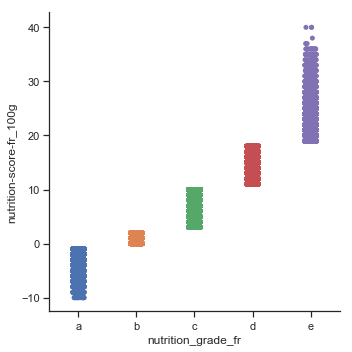

In [11]:
data_sort = data_sol.sort_values(by=['nutrition_grade_fr'])
sns.catplot(x="nutrition_grade_fr", y="nutrition-score-fr_100g", data=data_sort)

# Comparatif du nombre de lignes supprimées par les différents critères

In [12]:
# Doublons sur code
compare_supp = pd.DataFrame(columns=['Critere', 'Elements restants'])

data_doublons = data.drop_duplicates(subset='code', keep='first', inplace=False)
compare_supp = compare_supp.append({'Critere':'Suppression doublons', 'Elements restants':data_doublons.shape[0]}, ignore_index=True)

In [13]:
# Produits FR
data_countries = data.drop(data.loc[data['countries_fr'].str.contains('Franc') == False].index, inplace=False)

compare_supp = compare_supp.append({'Critere':'Suppression hors FR', 'Elements restants':data_countries.shape[0]}, ignore_index=True)

In [14]:
# On supprime les produits pour lesquels les valeurs sont incohérentes - FAT
data_fat = data.drop(data.loc[data['fat_100g']<(data['saturated-fat_100g'] + data['monounsaturated-fat_100g'] +
                        data['polyunsaturated-fat_100g'])].index,
            inplace=False)

compare_supp = compare_supp.append({'Critere':'Suppression FAT', 'Elements restants':data_fat.shape[0]}, ignore_index=True)

In [15]:
# On supprime les produits pour lesquels les valeurs sont incohérentes - FAT
data_sucres = data.drop(data.loc[data['carbohydrates_100g'] < data['sugars_100g']].index, inplace=False)
compare_supp = compare_supp.append({'Critere':'Suppression Sucres', 'Elements restants':data_sucres.shape[0]}, ignore_index=True)

In [16]:
# on fixe un seuil pour lequel on estime que la valeur d'Energie est potentiellement erronée
seuil_energy = 10000

data_energy = data.drop(data.loc[data['energy_100g'] > seuil_energy].index, inplace=False)
compare_supp = compare_supp.append({'Critere':'Suppression Energie', 'Elements restants':data_energy.shape[0]}, ignore_index=True)

In [17]:
col_mandat = ['code',
              'energy_100g',
              'nutrition-score-fr_100g'
             ]

data_mandatory = data.dropna(axis='index', subset=col_mandat, inplace=False)
compare_supp = compare_supp.append({'Critere':'Valeurs obligatoires', 'Elements restants':data_mandatory.shape[0]}, ignore_index=True)

In [18]:
compare_supp

,Critere,Elements restants
0,Suppression doublons,320750
1,Suppression hors FR,98722
2,Suppression FAT,318738
3,Suppression Sucres,320089
4,Suppression Energie,320753
5,Valeurs obligatoires,221019


In [19]:
# Doublons sur code
compare_supp_cumul = pd.DataFrame(columns=['Critere', 'Elements restants'])

data_doublons = data.drop_duplicates(subset='code', keep='first', inplace=False)
compare_supp_cumul = compare_supp_cumul.append({'Critere':'Suppression doublons', 'Elements restants':data_doublons.shape[0]}, ignore_index=True)

# Produits FR
data_countries = data_doublons.drop(data_doublons.loc[data_doublons['countries_fr'].str.contains('Franc') == False].index, inplace=False)

compare_supp_cumul = compare_supp_cumul.append({'Critere':'Suppression hors FR', 'Elements restants':data_countries.shape[0]}, ignore_index=True)

# On supprime les produits pour lesquels les valeurs sont incohérentes - FAT
data_fat = data_countries.drop(data_countries.loc[data_countries['fat_100g']<(data_countries['saturated-fat_100g'] + data_countries['monounsaturated-fat_100g'] +
                        data_countries['polyunsaturated-fat_100g'])].index,
            inplace=False)

compare_supp_cumul = compare_supp_cumul.append({'Critere':'Suppression FAT', 'Elements restants':data_fat.shape[0]}, ignore_index=True)

# On supprime les produits pour lesquels les valeurs sont incohérentes - FAT
data_sucres = data_fat.drop(data_fat.loc[data_fat['carbohydrates_100g'] < data_fat['sugars_100g']].index, inplace=False)
compare_supp_cumul = compare_supp_cumul.append({'Critere':'Suppression Sucres', 'Elements restants':data_sucres.shape[0]}, ignore_index=True)

# on fixe un seuil pour lequel on estime que la valeur d'Energie est potentiellement erronée
seuil_energy = 10000

data_energy = data_sucres.drop(data_sucres.loc[data_sucres['energy_100g'] > seuil_energy].index, inplace=False)
compare_supp_cumul = compare_supp_cumul.append({'Critere':'Suppression Energie', 'Elements restants':data_energy.shape[0]}, ignore_index=True)

col_mandat = ['code',
              'energy_100g',
              'nutrition-score-fr_100g'
             ]

data_mandatory = data_energy.dropna(axis='index', subset=col_mandat, inplace=False)
compare_supp_cumul = compare_supp_cumul.append({'Critere':'Valeurs obligatoires', 'Elements restants':data_mandatory.shape[0]}, ignore_index=True)

C:\Users\Administrateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


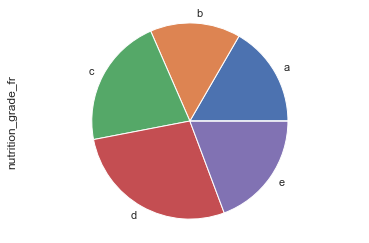

C:\Users\Administrateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


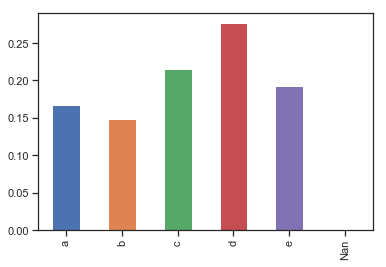

In [20]:
# Diagramme en secteurs
data_mandatory["nutrition_grade_fr"].value_counts(normalize=True).loc[grades].plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
data_mandatory["nutrition_grade_fr"].value_counts(normalize=True).loc[grades].plot(kind='bar')
plt.show()

In [21]:
compare_supp_cumul

,Critere,Elements restants
0,Suppression doublons,320750
1,Suppression hors FR,98722
2,Suppression FAT,98605
3,Suppression Sucres,98506
4,Suppression Energie,98501
5,Valeurs obligatoires,61182


## On supprime les doublons sur la première colonne (le code est un identifiant unique)

In [22]:
data.shape

(320772, 162)

In [23]:
data.drop_duplicates(subset='code', keep='first', inplace=True)

In [24]:
data.shape

(320750, 162)

# Corrélation utilisée avant nettoyage pour la présentation

-5.484716151179278 1379.8824493847353


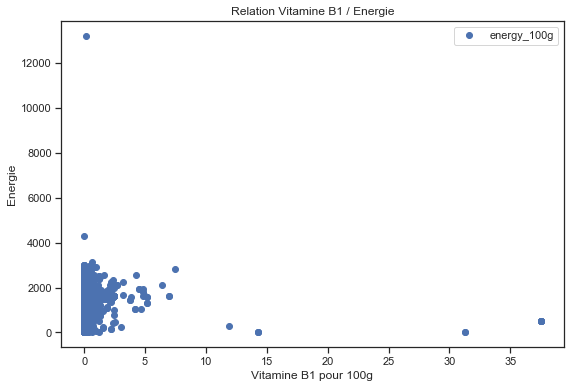

In [25]:
import statsmodels.api as sm

col_mandat = ['vitamin-b1_100g', 'energy_100g']

#data_temp = data.dropna(axis='index', subset=col_mandat, inplace=False)
data_temp = data[data['vitamin-b1_100g'] < 50].dropna(axis='index', subset=col_mandat, inplace=False)
data_temp.columns = data_temp.columns.str.replace('-','_')

X = data_temp[['vitamin_b1_100g']]
Y = data_temp['energy_100g']
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['vitamin_b1_100g'],result.params['intercept']
print (a,b)
str_eq = "y = " + str(round(a,2)) + " x + " + str(round(b,0))

plt.figure(1, figsize=(9, 6))
plt.plot(data_temp.vitamin_b1_100g,data_temp.energy_100g, "o")
#plt.plot(np.arange(5),[a*x+b for x in np.arange(5)],label=str_eq)
plt.ylabel("Energie")
plt.xlabel("Vitamine B1 pour 100g")
plt.title("Relation Vitamine B1 / Energie")
plt.legend()
plt.show()

## Suppression des colonnes inutiles ou inexploitables

### Suppression des colonnes dont le champ n'est pas utile

On spécifie la liste des colonnes dont le champ n'a pas d'utilité pour l'analyse demandée:
    - code: si ce champ ne comporte pas de doublon, il devrait être l'identifiant unique de chaque individu (produit);
    - url: INUTILE
    - creator: INUTILE
    - created_t: INUTILE car info en doublon avec le champ suivant
    - created_datetime: à conserver pour conseil sur suite du projet client
    - last_modified_t: INUTILE car info en doublon avec le champ suivant
    - last_modified_datetime: à conserver pour conseil sur suite du projet client
    - product_name:
    - generic_name:
    - quantity:INUTILE
    - packaging:INUTILE
    - packaging_tags:INUTILE
    - brands:INUTILE
    - brands_tags:INUTILE
    - categories:INUTILE
    - categories_tags:INUTILE
    - categories_fr:INUTILE
    - origins: INUTILE car doublon
    - origins_tags:INUTILE
    - manufacturing_places:INUTILE
    - manufacturing_places_tags:INUTILE
    - labels:INUTILE car doublon
    - labels_tags:INUTILE car doublon
    - labels_fr:INUTILE
    - emb_codes:INUTILE
    - emb_codes_tags:INUTILE
    - first_packaging_code_geo:INUTILE
    - cities:INUTILE
    - cities_tags:INUTILE
    - purchase_places:INUTILE
    - stores:INUTILE
    - countries:INUTILE
    - countries_tags:INUTILE
    - countries_fr:
    - ingredients_text:INUTILE
    - allergens:
    - allergens_fr:INUTILE car doublon
    - traces:INUTILE car doublon
    - traces_tags:INUTILE car doublon
    - traces_fr:
    - serving_size:INUTILE
    - no_nutriments:
    - additives_n:
    - additives:INUTILE car doublon
    - additives_tags:INUTILE car doublon
    - additives_fr:
    - ingredients_from_palm_oil_n:
    - ingredients_from_palm_oil:
    - ingredients_from_palm_oil_tags:
    - ingredients_that_may_be_from_palm_oil_n:
    - ingredients_that_may_be_from_palm_oil:
    - ingredients_that_may_be_from_palm_oil_tags:
    - nutrition_grade_uk:INUTILE car doublon
    - nutrition_grade_fr:
    - pnns_groups_1:
    - pnns_groups_2:
    - states:INUTILE car doublon
    - states_tags:INUTILE car doublon
    - states_fr:
    - main_category:
    - main_category_fr:
    - image_url: INUTILE
    - image_small_url:INUTILE
    - energy_100g:
 	- energy-from-fat_100g:
 	- fat_100g:
	- saturated-fat_100g:
	- butyric-acid_100g:
	- caproic-acid_100g:
	- caprylic-acid_100g:
	- capric-acid_100g:
	- lauric-acid_100g:
	- myristic-acid_100g:
	- palmitic-acid_100g:
	- stearic-acid_100g:
	- arachidic-acid_100g:
	- behenic-acid_100g:
	- lignoceric-acid_100g:
	- cerotic-acid_100g:
	- montanic-acid_100g:
	- melissic-acid_100g:
	- monounsaturated-fat_100g:
	- polyunsaturated-fat_100g:
	- omega-3-fat_100g:
	- alpha-linolenic-acid_100g:
	- eicosapentaenoic-acid_100g:
	- docosahexaenoic-acid_100g:
	- omega-6-fat_100g:
	- linoleic-acid_100g:
	- arachidonic-acid_100g:
	- gamma-linolenic-acid_100g:
	- dihomo-gamma-linolenic-acid_100g:
	- omega-9-fat_100g:
	- oleic-acid_100g:
	- elaidic-acid_100g:
	- gondoic-acid_100g:
	- mead-acid_100g:
	- erucic-acid_100g:
	- nervonic-acid_100g:
	- trans-fat_100g:
	- cholesterol_100g:
	- carbohydrates_100g:
	- sugars_100g:
	- sucrose_100g:
	- glucose_100g:
	- fructose_100g:
	- lactose_100g:
	- maltose_100g:
	- maltodextrins_100g:
	- starch_100g:
	- polyols_100g:
	- fiber_100g:
	- proteins_100g:
	- casein_100g:
	- serum-proteins_100g:
	- nucleotides_100g:
	- salt_100g:
	- sodium_100g:
	- alcohol_100g:
	- vitamin-a_100g:
	- beta-carotene_100g:
	- vitamin-d_100g:
	- vitamin-e_100g:
	- vitamin-k_100g:
	- vitamin-c_100g:
	- vitamin-b1_100g:
	- vitamin-b2_100g:
	- vitamin-pp_100g:
	- vitamin-b6_100g:
	- vitamin-b9_100g:
	- folates_100g:
	- vitamin-b12_100g:
	- biotin_100g:
	- pantothenic-acid_100g:
	- silica_100g:
	- bicarbonate_100g:
	- potassium_100g:
	- chloride_100g:
	- calcium_100g:
	- phosphorus_100g:
	- iron_100g:
	- magnesium_100g:
	- zinc_100g:
	- copper_100g:
	- manganese_100g:
	- fluoride_100g:
	- selenium_100g:
	- chromium_100g:
	- molybdenum_100g:
	- iodine_100g:
	- caffeine_100g:
	- taurine_100g:
	- ph_100g:
	- fruits-vegetables-nuts_100g:
	- collagen-meat-protein-ratio_100g:
	- cocoa_100g:
	- chlorophyl_100g:
	- carbon-footprint_100g:
	- nutrition-score-fr_100g:
	- nutrition-score-uk_100g:INUTILE car doublon
	- glycemic-index_100g:
	- water-hardness_100g
On conserve les champs suivants car ils contiennent les informations nutrinionnelles. On contrôle ensuite leur taux de remplissage, pour supprimer ceux dont le taux est insuffisant.

In [26]:
col_inutiles = ['url', 'creator', 'created_t', 'last_modified_t', 'quantity', 'packaging', 'packaging_tags',
                'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins',
                'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags',
                'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags',
                'purchase_places', 'stores', 'countries', 'countries_tags', 'ingredients_text', 'allergens_fr',
                'traces', 'traces_tags', 'serving_size', 'additives', 'additives_tags', 'nutrition_grade_uk',
                'states', 'states_tags', 'states_fr', 'main_category', 'main_category_fr', 'image_url',
                'image_small_url', 'nutrition-score-uk_100g', 'additives_n', 'ingredients_from_palm_oil_n',
                'ingredients_that_may_be_from_palm_oil_n', 'alcohol_100g', 'vitamin-c_100g', 'calcium_100g',
                'iron_100g'
               ]
data.drop(columns = col_inutiles, axis=1, inplace=True)

# Affichage des colonnes restantes
print("Colonnes restantes:")
for col in range(len(data.columns)):
    print(col, ":\t", data.columns[col])

Colonnes restantes:
0 :	 code
1 :	 created_datetime
2 :	 last_modified_datetime
3 :	 product_name
4 :	 generic_name
5 :	 countries_fr
6 :	 allergens
7 :	 traces_fr
8 :	 no_nutriments
9 :	 additives_fr
10 :	 ingredients_from_palm_oil
11 :	 ingredients_from_palm_oil_tags
12 :	 ingredients_that_may_be_from_palm_oil
13 :	 ingredients_that_may_be_from_palm_oil_tags
14 :	 nutrition_grade_fr
15 :	 pnns_groups_1
16 :	 pnns_groups_2
17 :	 energy_100g
18 :	 energy-from-fat_100g
19 :	 fat_100g
20 :	 saturated-fat_100g
21 :	 butyric-acid_100g
22 :	 caproic-acid_100g
23 :	 caprylic-acid_100g
24 :	 capric-acid_100g
25 :	 lauric-acid_100g
26 :	 myristic-acid_100g
27 :	 palmitic-acid_100g
28 :	 stearic-acid_100g
29 :	 arachidic-acid_100g
30 :	 behenic-acid_100g
31 :	 lignoceric-acid_100g
32 :	 cerotic-acid_100g
33 :	 montanic-acid_100g
34 :	 melissic-acid_100g
35 :	 monounsaturated-fat_100g
36 :	 polyunsaturated-fat_100g
37 :	 omega-3-fat_100g
38 :	 alpha-linolenic-acid_100g
39 :	 eicosapentaenoic-aci

### Projet en France, donc on conserve uniquement les produits disponibles en France

In [27]:
#On liste les valeurs uniques prises par le champ 'countries' pour déterminer comment on va faire le tri
data.countries_fr.unique()

array(['France', 'États-Unis', 'Royaume-Uni', 'France,États-Unis',
       'Canada', 'Suisse', 'Espagne', 'Allemagne', 'Slovénie', 'Italie',
       'Roumanie', 'Australie', 'Portugal', 'France,Royaume-Uni',
       'Belgique,France,Pays-Bas,Royaume-Uni', 'Guadeloupe', nan,
       'Royaume-Uni,États-Unis', 'Canada,États-Unis', 'Pays-Bas',
       'Australie,France', 'Canada,France,Suisse,États-Unis',
       'France,États-Unis,en:Etats-unis', 'Irlande', 'France,La Réunion',
       'Taiwan', 'Australie,Suisse', 'France,Allemagne', 'Brésil',
       'Belgique,France', 'République dominicaine',
       'États-Unis,en:Australie', 'Arabie saoudite',
       'Émirats arabes unis', 'Irak', 'Koweït', 'Moldavie', 'Belgique',
       'Nouvelle-Calédonie', 'Singapour', 'Finlande',
       'Australie,États-Unis', 'France,Suisse',
       'Australie,Nouvelle-Zélande,Singapour,Thaïlande,États-Unis',
       'Polynésie française', 'Panama', 'Costa Rica', 'Mexique',
       'États-Unis,en:Pays-bas', 'Espagne,Royau

In [28]:
# On supprime les produits dont le champs 'countries_fr' ne contient pas la chaine 'Franc'
data_c = data['countries_fr'].str.contains('Franc')
data.drop(data.loc[data_c == False].index, inplace=True)
data.shape

(98722, 111)

In [29]:
# Puis on supprime la colonne 'countries_fr' car elle ne sert plus
data.drop('countries_fr', axis='columns', inplace=True)

### Suppression des valeurs hors échelle

In [30]:
# Fonction qui supprime les valeurs hors échelle
def hors_echelle(valeur):
    if valeur < 0 or valeur > 100:
        return np.NaN
    else:
        return valeur

In [31]:
# Liste des colonnes dont le nom se termine par "_100g"
# On retire les variables d'énergie pour 100g car le type de valeur est différent

liste_col = []
for col in range(len(data.columns)):
    if data.columns[col][-5:] == '_100g':
        liste_col.append(data.columns[col])
liste_col.remove('energy_100g')
liste_col.remove('nutrition-score-fr_100g')
#liste_col.remove('energy-from-fat_100g' )

for col in liste_col:
    data[col] = [hors_echelle(val) for val in data[col]]


### Suppression des colonnes dont le taux de remplissage est insuffisant 
On supprime les champs dont le taux de remplissage est inférieur à 5 %. (utiliser quantiles selon courbe précédente)

0 :	 code 	 100.0
1 :	 created_datetime 	 100.0
2 :	 last_modified_datetime 	 100.0
3 :	 product_name 	 92.66121026721501
4 :	 generic_name 	 38.88393671116874
5 :	 allergens 	 23.223800166123052
6 :	 traces_fr 	 19.437410101091956
7 :	 no_nutriments 	 0.0
8 :	 additives_fr 	 30.890784222361784
9 :	 ingredients_from_palm_oil 	 0.0
10 :	 ingredients_from_palm_oil_tags 	 3.735742792893175
11 :	 ingredients_that_may_be_from_palm_oil 	 0.0
12 :	 ingredients_that_may_be_from_palm_oil_tags 	 6.343064362553433
13 :	 nutrition_grade_fr 	 62.269808148133144
14 :	 pnns_groups_1 	 65.87690686979599
15 :	 pnns_groups_2 	 68.07195964425357
16 :	 energy_100g 	 65.50110411053261
17 :	 energy-from-fat_100g 	 0.009116508984826077
18 :	 fat_100g 	 48.32458823767752
19 :	 saturated-fat_100g 	 63.24628755495228
20 :	 butyric-acid_100g 	 0.0
21 :	 caproic-acid_100g 	 0.0
22 :	 caprylic-acid_100g 	 0.0
23 :	 capric-acid_100g 	 0.0
24 :	 lauric-acid_100g 	 0.001012945442758453
25 :	 myristic-acid_100g 	 0.0


C:\Users\Administrateur\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


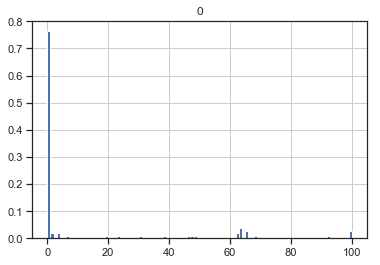

In [32]:
# Taux de remplissage des colonnes
taux_col = []
nb_prod = len(data)
taux = 0
for col in range(len(data.columns)):
    taux = data[data.columns[col]].count()/nb_prod*100
    taux_col.append(taux)
    print(col, ":\t", data.columns[col], "\t", taux)
# Tracé des taux de remplissage
df = pd.DataFrame(data=taux_col)
df.hist(normed=True, bins = 100)
plt.show()

In [33]:
taux_min = .01
nb_prod = len(data)

qte_min = taux_min * nb_prod
col_sup = 0
for col in range(len(data.columns)-1,-1,-1):
    if data[data.columns[col]].count() < qte_min:
        col_sup += 1
        print("Suppression de la colonne '", data.columns[col],"'.")
        data.drop(data.columns[col], axis='columns', inplace=True)
print("Colonnes supprimées: ", col_sup)
data.shape

Suppression de la colonne ' water-hardness_100g '.
Suppression de la colonne ' glycemic-index_100g '.
Suppression de la colonne ' carbon-footprint_100g '.
Suppression de la colonne ' chlorophyl_100g '.
Suppression de la colonne ' cocoa_100g '.
Suppression de la colonne ' collagen-meat-protein-ratio_100g '.
Suppression de la colonne ' ph_100g '.
Suppression de la colonne ' taurine_100g '.
Suppression de la colonne ' caffeine_100g '.
Suppression de la colonne ' iodine_100g '.
Suppression de la colonne ' molybdenum_100g '.
Suppression de la colonne ' chromium_100g '.
Suppression de la colonne ' selenium_100g '.
Suppression de la colonne ' fluoride_100g '.
Suppression de la colonne ' manganese_100g '.
Suppression de la colonne ' copper_100g '.
Suppression de la colonne ' zinc_100g '.
Suppression de la colonne ' magnesium_100g '.
Suppression de la colonne ' phosphorus_100g '.
Suppression de la colonne ' chloride_100g '.
Suppression de la colonne ' potassium_100g '.
Suppression de la colonne

(98722, 26)

C:\Users\Administrateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


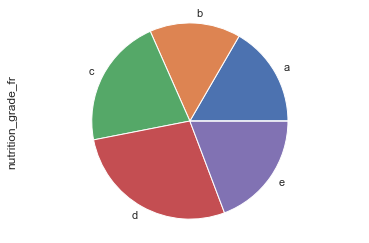

C:\Users\Administrateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


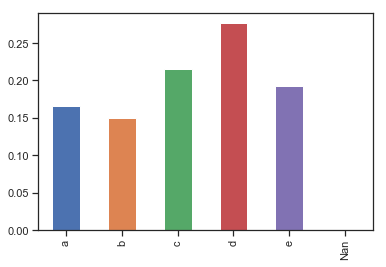

In [34]:
# Diagramme en secteurs
data["nutrition_grade_fr"].value_counts(normalize=True).loc[grades].plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
data["nutrition_grade_fr"].value_counts(normalize=True).loc[grades].plot(kind='bar')
plt.show()

## On cherche valeurs incohérentes de fat

In [35]:
data_fat = data.loc[data['fat_100g']<(data['saturated-fat_100g'] + data['monounsaturated-fat_100g'] + 
                             data['polyunsaturated-fat_100g'])]
print(data_fat.head(20))
data_fat.shape

                 code      created_datetime last_modified_datetime  \
29130   0034000449095  2015-02-12T13:36:43Z   2015-10-31T08:49:54Z   
54995   0042400189008  2017-03-01T18:26:11Z   2017-03-09T12:42:49Z   
79938        00722728  2014-03-02T14:58:32Z   2017-04-02T14:12:53Z   
101690  0084114009982  2016-11-08T16:45:55Z   2017-03-09T09:46:02Z   
113925  0233360971172  2017-03-17T17:47:03Z   2017-04-17T18:46:28Z   
163270  0855564003024  2016-06-30T21:00:58Z   2017-03-19T10:59:14Z   
177840       20095000  2013-04-21T09:06:25Z   2014-09-16T07:16:23Z   
178076       20124830  2015-01-09T06:51:44Z   2015-05-01T19:32:00Z   
179055       20279981  2016-10-23T09:09:16Z   2016-10-23T09:16:13Z   
187211  3011360030504  2013-03-24T20:29:12Z   2016-11-22T20:49:06Z   
187378  3017239003723  2016-08-01T14:15:33Z   2016-10-29T14:23:56Z   
188704  3023430535505  2014-11-10T06:34:30Z   2016-02-03T20:16:14Z   
193404  3095753829012  2014-04-14T20:14:40Z   2016-01-10T10:30:51Z   
193405  309575383001

(117, 26)

In [36]:
# On supprime les produits pour lesquels les valeurs sont incohérentes
data.drop(data.loc[data['fat_100g']<(data['saturated-fat_100g'] + data['monounsaturated-fat_100g'] +
                        data['polyunsaturated-fat_100g'])].index,
            inplace=True)
data.drop(data.loc[data['carbohydrates_100g'] < data['sugars_100g']].index, inplace=True)
data.shape

(98506, 26)

C:\Users\Administrateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


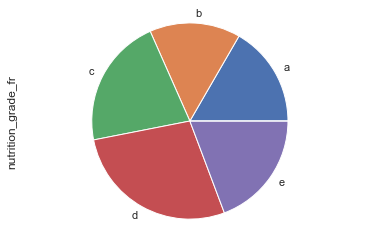

C:\Users\Administrateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


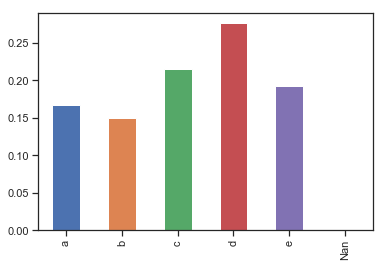

In [37]:
# Diagramme en secteurs
data["nutrition_grade_fr"].value_counts(normalize=True).loc[grades].plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
data["nutrition_grade_fr"].value_counts(normalize=True).loc[grades].plot(kind='bar')
plt.show()

### Suppression des produits pour lesquels les données attendues sont manquantes

On supprime les produits (lignes) pour lesquels il manque au moins un des champs que l'on estime obligatoires:
    - code (identifiant)
    - energy_100g
    - fat_100g
    - saturated-fat_100g
    - carbohydrates_100g
    - sugars_100g
    - fiber_100g
    - proteins_100g
    - salt_100g
    - nutrition_grade_fr
    

In [38]:
import time 
tmps1=time.time()


l_max = len(data.index)-1    # len(data.index)-1

# Listes des colonnes "mandatory"
col_mandat = ['code',
              'energy_100g',
              #'fat_100g',
              #'saturated-fat_100g',
              #'carbohydrates_100g',
              #'sugars_100g',
              #'fiber_100g',
              #'proteins_100g',
              #'salt_100g',
              'nutrition-score-fr_100g'
             ]

data.dropna(axis='index', subset=col_mandat, inplace=True)

tmps2=time.time()-tmps1
print("Temps d'execution = ", tmps2)

Temps d'execution =  0.07180929183959961


In [39]:
data.shape

(61187, 26)

C:\Users\Administrateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


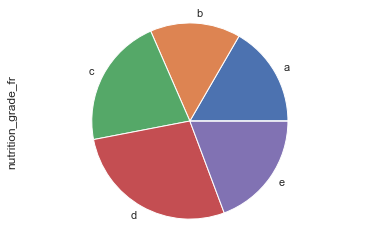

In [40]:
# Diagramme en secteurs
data["nutrition_grade_fr"].value_counts(normalize=True).loc[grades].plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

On remarque qu'il ya des champs qui sortent nan --> il faut les corriger ou les supprimer pour pouvoir les analyser.

### Analyse de détail des champs
#### energy_100g (kJ per 100g or 100mL of product)
    source: https://fr.wikipedia.org/wiki/Ordres_de_grandeur_d%27%C3%A9nergie
    Ordres de grandeur:
        17 kJ - énergie dégagée par le métabolisme d'un gramme de sucre ou de protéine.
        38 kJ - énergie dégagée par le métabolisme d'un gramme de matière grasse.
        1000 kJ(= 1 MJ = 239 kcal) - la valeur énergétique de portions alimentaires telles que : une barre de 40 g de Chocolat noir amer, ou 67 g de riz complet cru, ou 266 g de riz blanc cuit à l'eau, ou 100 g de pain «courant français», ou 300 g de pomme de terre, ou 1,6 kg de concombre.
        6300 kJ (1 500 kcal) - une valeur souvent recommandée pour l'énergie nutritionnelle d'une femme ne faisant pas d'activité sportive par jour (2 000 kcal = 8,4×106 J pour les hommes).
        
        la valeur max de l'échantillon est 3251373 kJ (3,2 gigajoule), soit l'équivalent d'environ 400 fois l'énergie nutritionnelle recommandée pour un adulte. => On regarde quel type de produit a une telle valeur.
        

#### monounsaturated-fat_100g
    max = 557 => à supprimer car > à 100g
    Monounsaturated fats are healthy fats found in olive oil, avocados and certain nuts. There are many different types of MUFAs. Oleic acid is the most common type. Other MUFAs include palmitoleic acid and vaccenic acid.
    => Faire Lorenz avec oleic, palmitoleic, vaccenic / monounsaturated fat?
    
    
    
#### Champs avec valeurs négatives
    vitamin-a_100g
    (biotin_100g)
    (pantothenic-acid_100g)
    silica_100g
    bicarbonate_100g 
    chloride_100g
    iron_100g
    copper_100g
    selenium_100g

#### Champs avec valeurs supérieures à 100g
    carbohydrates_100g
    fructose_100g
    salt_100g
    sodium_100g
    vitamin-b1_100g
    folates_100g
    potassium_100g
    calcium_100g
    phosphorus_100g
    magnesium_100g
    
#### Champs avec valeurs négatives ET valeurs supérieures à 100g
    trans-fat_100g
    sugars_100g
    fiber_100g
    proteins_100g
    vitamin-c_100g

## Analyse et nettoyage de valeurs aberrantes
On commence par regarder quels produits ont une valeur énergétique excessivement élevée. Par exemple, des produits pour sportifs de type protéines ont des valeurs nutritionelles de l'ordre de 1500-2000 kJ pour 100g. On peut donc filtrer les valeurs supérieures à 10000 kJ pour 100g pour définir des valeurs aberrantes.

In [41]:
# on fixe un seuil pour lequel on estime que la valeur est potentiellement erronée
seuil_energy = 10000

data_ener = data.loc[data['energy_100g'] > seuil_energy]
print(data_ener.head(20))

                 code      created_datetime last_modified_datetime  \
212928  3257983143096  2016-06-04T08:31:26Z   2017-04-11T17:27:38Z   
219302  3270160689774  2016-04-19T10:56:26Z   2017-02-27T17:07:32Z   
223318  3291960006127  2017-02-02T16:56:21Z   2017-03-31T12:19:56Z   
245311  3596710288755  2014-08-09T15:52:34Z   2017-04-07T21:58:05Z   
249101  3661405001053  2016-09-02T16:44:30Z   2017-03-17T13:41:54Z   

                                             product_name        generic_name  \
212928                                        Pois cassés                 NaN   
219302                                                NaN                 NaN   
223318  Huiles vierge biologique de Colza - première p...  Huile de Colza Bio   
245311         mini choux goût fromage de chèvre - poivre  biscuits apéritifs   
249101  Légume Noisettes Carottes, 500 Grammes, Marque...                 NaN   

       allergens                                     traces_fr  \
212928       NaN          

In [42]:
data.shape

(61187, 26)

In [43]:
#on supprime les valeurs au dessus du seuil 

data.drop(data.loc[data['energy_100g'] > seuil_energy].index, inplace=True)


In [44]:
data.shape

(61182, 26)

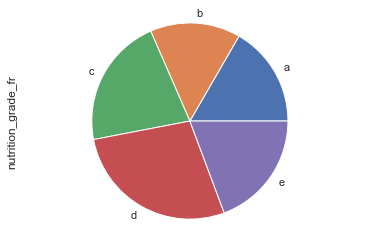

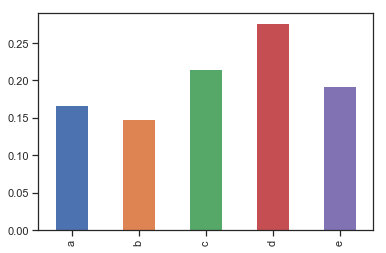

In [45]:
# VARIABLE QUALITATIVE
grades = ['a', 'b', 'c','d','e']

# Diagramme en secteurs
data["nutrition_grade_fr"].value_counts(normalize=True).loc[grades].plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
data["nutrition_grade_fr"].value_counts(normalize=True).loc[grades].plot(kind='bar')
plt.show()


# VARIABLE QUANTITATIVE
# Diagramme en bâtons
#data["quart_mois"].value_counts(normalize=True).plot(kind='bar',width=0.1)
#plt.show()

# Histogramme
#data["montant"].hist(normed=True)
#plt.show()
# Histogramme plus beau
#data[data.montant.abs() < 100]["montant"].hist(normed=True,bins=20)
#plt.show()

## Sauvegarde de la base nettoyée

In [46]:
# Enregistrement au format CSV
data.to_csv('Base/clean_database.csv',index=False)

In [47]:
data.describe()

,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g
count,61182.000000,44054.000000,61182.000000,997.000000,1014.000000,43997.000000,61178.000000,44644.000000,61182.000000,61180.000000,61182.000000,2759.000000,61182.000000
mean,1123.602877,13.298272,5.433048,17.966740,9.835054,27.835501,13.405349,2.541842,7.741177,1.075986,0.425765,30.156713,8.693096
std,786.750827,16.624367,8.516798,21.569299,14.860522,27.255068,19.021603,4.547267,7.835804,3.682653,1.500813,32.159924,9.048466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,435.000000,1.400000,0.300000,2.600000,1.500000,4.200000,1.000000,0.000000,1.900000,0.080000,0.031496,0.000000,1.000000
50%,1041.000000,7.000000,2.000000,8.400000,3.500000,14.900000,4.000000,1.400000,6.000000,0.550590,0.217000,18.000000,9.000000
75%,1660.000000,21.000000,7.400000,25.000000,11.500000,53.000000,17.900000,3.200000,10.800000,1.230000,0.484252,50.000000,15.000000
max,9983.000000,100.000000,100.000000,80.000000,75.000000,100.000000,100.000000,100.000000,100.000000,100.000000,83.000000,100.000000,40.000000
